In [1]:
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("IMDB Dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [7]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


### Text Cleaning

In [9]:
def clean_text(text):
    # 1. Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    # 2. Convert to lowercase
    text = text.lower()
    # 3. Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # 4. Remove numbers
    text = re.sub(r'\d+', '', text)
    # 5. Reduce multiple spaces to single space and strip leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [10]:
df['cleaned_review'] = df['review'].apply(clean_text)

In [11]:
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...


### Tokenization 

In [13]:
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Sadık\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [14]:
df["word_tokens"] = df["cleaned_review"].apply(nltk.word_tokenize)

In [15]:
df.head()

,review,sentiment,cleaned_review,word_tokens
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,"[a, wonderful, little, production, the, filmin..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,"[basically, theres, a, family, where, a, littl..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,"[petter, matteis, love, in, the, time, of, mon..."


### Stopword Removal

In [17]:
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sadık\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
df['filtered_tokens'] = df['word_tokens'].apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words]
)

In [19]:
df.head()

,review,sentiment,cleaned_review,word_tokens,filtered_tokens
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione...","[one, reviewers, mentioned, watching, oz, epis..."
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,"[a, wonderful, little, production, the, filmin...","[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,"[basically, theres, a, family, where, a, littl...","[basically, theres, family, little, boy, jake,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,"[petter, matteis, love, in, the, time, of, mon...","[petter, matteis, love, time, money, visually,..."


### Lemmatization

In [21]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sadık\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
lemmas = WordNetLemmatizer()

In [23]:
df['lemmatized_tokens'] = df['filtered_tokens'].apply(
    lambda tokens: [lemmas.lemmatize(word, pos="v") for word in tokens]
)

In [24]:
df[["filtered_tokens",'lemmatized_tokens']].head()

,filtered_tokens,lemmatized_tokens
0,"[one, reviewers, mentioned, watching, oz, epis...","[one, reviewers, mention, watch, oz, episode, ..."
1,"[wonderful, little, production, filming, techn...","[wonderful, little, production, film, techniqu..."
2,"[thought, wonderful, way, spend, time, hot, su...","[think, wonderful, way, spend, time, hot, summ..."
3,"[basically, theres, family, little, boy, jake,...","[basically, theres, family, little, boy, jake,..."
4,"[petter, matteis, love, time, money, visually,...","[petter, matteis, love, time, money, visually,..."


### Feature Engineering(TF-IDF)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

df['lemmatized_text'] = df['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))

In [27]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['lemmatized_text'])

In [28]:
df.head()

,review,sentiment,cleaned_review,word_tokens,filtered_tokens,lemmatized_tokens,lemmatized_text
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione...","[one, reviewers, mentioned, watching, oz, epis...","[one, reviewers, mention, watch, oz, episode, ...",one reviewers mention watch oz episode youll h...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,"[a, wonderful, little, production, the, filmin...","[wonderful, little, production, filming, techn...","[wonderful, little, production, film, techniqu...",wonderful little production film technique una...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su...","[think, wonderful, way, spend, time, hot, summ...",think wonderful way spend time hot summer week...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,"[basically, theres, a, family, where, a, littl...","[basically, theres, family, little, boy, jake,...","[basically, theres, family, little, boy, jake,...",basically theres family little boy jake think ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,"[petter, matteis, love, in, the, time, of, mon...","[petter, matteis, love, time, money, visually,...","[petter, matteis, love, time, money, visually,...",petter matteis love time money visually stun f...


### Modelling

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

In [31]:
y = df['sentiment']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    tfidf_matrix, y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Multinomial Naive Bayes': MultinomialNB(),
    'XGBoost': xgb.XGBClassifier(random_state=42, verbosity=0),
    'LightGBM': lgb.LGBMClassifier(random_state=42, verbosity=-1),
    'Random Forest': RandomForestClassifier(random_state=42)
}

results = {}

In [32]:
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Model: {name}")
    print(f"{'='*50}")
    
    print("Model eğitiliyor...")

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'predictions': y_pred
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
Model eğitiliyor...
Accuracy: 0.8930
Precision: 0.8932
Recall: 0.8930
F1-Score: 0.8930

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Model: Multinomial Naive Bayes
Model eğitiliyor...
Accuracy: 0.8624
Precision: 0.8627
Recall: 0.8624
F1-Score: 0.8624

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      5000
           1       0.87      0.85      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Model: XGBoost
Model eğitiliyor...
Accuracy: 0.8536
Precision: 

#### Model Comparison

In [34]:
comparison_df = pd.DataFrame(results).T
comparison_df = comparison_df.drop('predictions', axis=1)
print(comparison_df.round(4))

                        accuracy precision  recall        f1
Logistic Regression        0.893   0.89317   0.893  0.892988
Multinomial Naive Bayes   0.8624  0.862668  0.8624  0.862375
XGBoost                   0.8536  0.854144  0.8536  0.853544
LightGBM                  0.8549  0.855129  0.8549  0.854877
Random Forest             0.8502  0.850206  0.8502  0.850199


#### Best Model


Best model: Logistic Regression
Best accuracy: 0.8930

BEST MODEL CONFUSION MATRIX - Logistic Regression


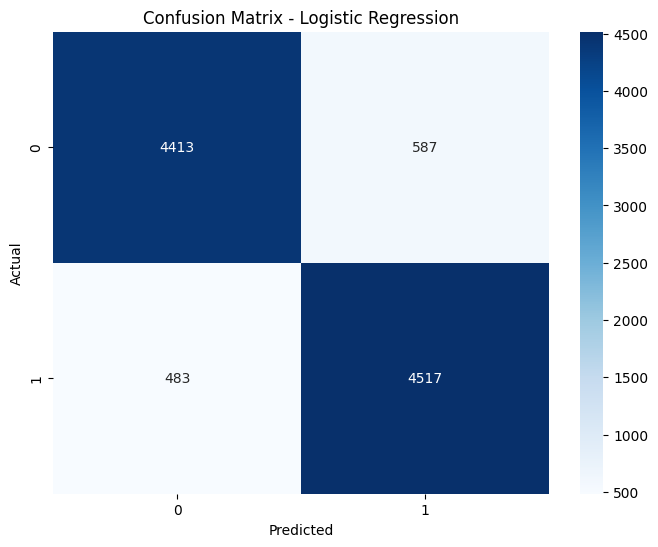

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

best_model_name = comparison_df['accuracy'].idxmax()
best_accuracy = comparison_df['accuracy'].max()

print(f"\nBest model: {best_model_name}")
print(f"Best accuracy: {best_accuracy:.4f}")

best_model = models[best_model_name]
best_model.fit(X_train, y_train)

print(f"\n{'='*50}")
print(f"BEST MODEL CONFUSION MATRIX - {best_model_name}")
print(f"{'='*50}")

best_predictions = best_model.predict(X_test)
cm = confusion_matrix(y_test, best_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


MODEL ACCURACY COMPARISON GRAPH


(0.0, 1.0)

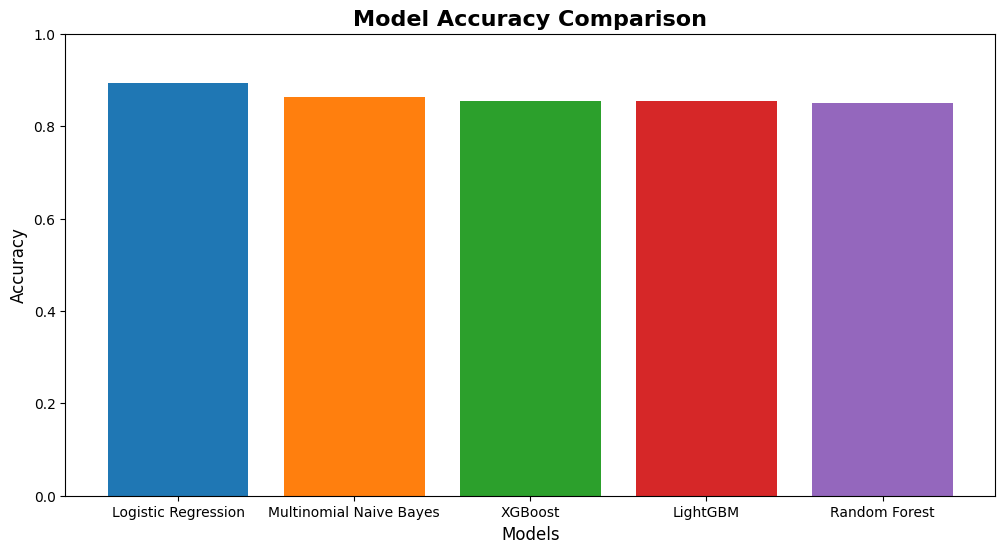

In [37]:
print(f"\n{'='*50}")
print("MODEL ACCURACY COMPARISON GRAPH")
print(f"{'='*50}")

model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]

plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)